# Análisis exploratorio de los datos de las reseñas de Yelp

Ya que el archivo pesaba demasiado para abrirlo a primeras, en un paso previo se dividió en 5 partes. Para luego leerlo como pueden observar a continuación:

In [1]:
import pandas as pd
import os
# Directorio donde se encuentran los fragmentos
directory = 'divided_reviews_5_parts'

# Obtener la lista de archivos en el directorio
file_list = [f for f in os.listdir(directory) if f.endswith('.json')]

# Crear una lista para almacenar los DataFrames de los fragmentos
dataframes = []

# Cargar cada fragmento en un DataFrame y agregarlo a la lista
for file in file_list:
    file_path = os.path.join(directory, file)
    df_fragment = pd.read_json(file_path, lines=True)
    dataframes.append(df_fragment)

# Concatenar los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

In [2]:
combined_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


En este punto se filtró por los hoteles de la cadena hotelera seleccionada "Holidays Inn"

In [3]:
target_business_ids = ['NZG9a_jMy5e6jC8TrDvP7Q', 'tIrYpQ8I6gh1FhhqYU-Ttg', '6lWw1OjyhzQbibr-f7bqew', '3SUtD_5ZVlb9iGqJNbKLiQ', 'OXlI1vJqFk874elfVY8OAw', 'N5u3K2Ec5GDOfWu0oXUqYA', 'Nz_FSXFlkWkd3sWWkQdLJA', 'YGdLTubcDfTdhQhyLL8LFQ', '9QTHJ8ClVpWtX6rUTaZjlw', 'e5MAg98tBURFaKCkaV-LUg', 'By9Qq0NRFkE8Cb_m1lBh8g', 'jVtoisBOkIE0xCEkrGaA3w', 'wkNxhr_QcOtIr9f3V9S37w', '1c-qM06URos7EskpHBPPZQ', 'vNOBBP4EKJo4elgjRTjBVw', 'ElO-UerL1Sg6KC2oqC3o9Q', 'ujbE4kCZIrkGikbh1g9scg', 'J86LJtszDf3saL0B51W_xw', 'siJ11S7P5TDPZ-b2VliUvw', 'OUECb_njmGutp0mVLZ6krw', 'Azeee5WDaYOxzjKtnkURqg', 'IRwXxLUE1lW9OvZXGcW6Sg', 'rfL6mTPb0F9G7gnYNtHPIA', 'RJiepHovHAZFZPMVSVsjpA', 'kwPVrYzSAGluOXWZ8dLC1Q', '-w-Y_iAwyFgaj-O4Sc9xvw', 'D_fQMuXrfDop3cKeAj7XKg', 'ILCgMRAQP4Or5HVW4Qx9Xw', '8N4moq96N16VxvlwSq4i5Q', '-Thb5brv1ARwIa0j5HHBeA', 'qm4CUb96KIa2Qv7w6U_ZYQ', '7k-GMSgWrU4NkZa87ZvnFQ', 'GvgLd-yCE50BTyaW5yKwwQ', 'IwI4wpDfG-OtZA4hQTNioQ', 'MgAaivwlfBqKkH7rNYp2Tg', 'bvm2HZYlGA_OHm3RNfCJbQ', '8neVKoaCGlOJlW9dstnNzQ', 'DAzM1AiX_gfyqjFbakPN6w', '8EnjHnmackxchmoQee99zw', '2GsqaQGFZfqjEU7nau7vfg', '1CCaaunP7_hKs7wXSSJsKA', 'pZ1w9Zvqyjv2VxjDBk5dEw', 'QM6ydur0eyQxrrUYF__XMQ', 'H6_5foPDTXokxm-rptLZdw', 'gqY-6Yss6sS-rF44JPMmTw', '1L295h7W__0Ofs3tIXjI-w', 'm1zQ2DhBg0hrTco5xYnwTw', '8kj5wW4_4fRjRHBntfHTag', 'ZlSf82FO5SH-KXM5O6nglA', 'Kyr2D8DqnzlJubnNp8poSw', 'btxsig4yBkNBQmDydFh5eg', 'vGWd9h3YlkHTLbOd29io2A', '8YitVOscv0atTmfVTZXrnw', 'k8stonbWUKchWoyQnrG2KA', 'YlgUOEWxxWrYt_ZVqHYsXA', 'c7JyGysafmch_P0XZ8dAdQ', 'YT5CjacTllBtvMaMJS3IbA', '3WHcQlBTNA8aP0kVNR5MzQ', '7F4G6k_v3rB6kgGi_azx7A', 'U_wKqFYSpD8D3CBl7e8ENA', 'fcohLhqJ5GHOSoJfCcrLUQ', '--eBbs3HpZYIym5pEw8Qdw', 'dc4Ikj6vYT3FaK41RbQbTA', 'vhKv74jPIBW7rsSr1BBTag', 'vfOFJnfAmjc7_geqA2xUQg', 'vDXMGgnANH3eJixQ4aG7eQ', 'tcmFtDXMdP13nnokz34gdA', 'ALqsok4gwNEVxL5GglXAEA', 'yHiSd7SxMI7UiBxqnTUWTA', 'wVGeGxHHUMm4EgzAprLKAw', 'gA2aAwPX6emDr9XFEH81Gg', 'g6gtGk8jTdlT1e-IW-NBSQ', 'jSLfrFv9_A_kIBaHdoGggg', 'OBnGgsK3uKoGcgyogMREvA', '9glHMq7pkeH0mQ41LNuyIA', 'XWmg4BfYkZcT4E9iNmnycg', 'kNsBF2nBLAA1oUqJwN9TgQ', 'WpfXYtBebEcTA_8O8kyD9g', 'hFkOBQ506FCptEzMCxnXKg', 'RGtXfVi75B1m8EvX8HVHtg', 'CZkcQugEnx6ABMEf6xV0qg', 'Oie4PpmACqZsJaEXBMWbGw', 'e4xnETLbsvK3IOkNFoTW5Q', 'WvNFmJE-RDMRJro_yYb4UQ', 'l4sOZLkxQekdzryZGdtvKQ', 'v0bxe65xGR2s2j9S8knxFw', '7b1Q94_vAlhoxalOB16bOg', '7YB0Vgi67h_dsxTI1ErVtA', '4W38r716n6ZBajtzL66Jew', '87UBfiH8EftEL4SLzZcFFg', 'OqG-r8_91lZMJ_QxUP5RCA', '2nNrr5KamJ3BodzqtOvMwg', '16reseNPtJGil7XBx3mAyQ', '3-69Zp0UWQafow9ilWDjvA', '34XP8VKP7nzw3jnd0pWaPw', 'PqHZG4DnclnnPXtU8UCfgA', 'I39uvHCyLF4q2mkZAGu-lw', 'xV32Y7jne4duaM3H_r_ryQ', 'z2suiNYy6cKyy_Oraaurlg', 'g7gvaY6Sq28EZhPeK6zcmg', 'XuC0WlUNm7IKzyoAQIw-7A', 'NvaHGU03m-hvXIGScPe6WQ', 'OevgFa-maNijC2anmt1_mQ', 'L1i13JBm7lJwBylDccQrgw', 'C-sm_r8z42YMFkNBViHM8A', 'WztYbdm0lcWSQT8W7z_nBw', 'E6G59qYgnP4p8QmWz-fjWg', 'xoRQ94Cgwjizxax0mVLJtQ', '8GGpmSmCey7K6JP5eXJScg', '3YWVle2IalnDWQ7TF_q29A', 'SqE1V_zkgKsVraWsIt5-CA', 'Nhd13EAGVISQNN4cSeWRvw', 'PWkvPO5LKBoLPvha3rxMHg', '6gDwEX2rOncUDQC75nu_pA', 'TlvK0vNWea6eb9G-uzLTRA', '9pR0X3oKUuSeL3DCsu97_w', 'RtvURViJ4C3yW00HROmIRA', 'BZGHcvWyl9A3c8QEf4Y_kw', 'wDlhgWwRSlHPgAiyifQhOg', 'gEdBdZ-wdUbEWeZeEB3xNg', '6oP1vO91nKVG35VmM-fphQ', '5-ZJE7qEtgGzypWNs9ausA', 'GrApaWj9j6zFQmBMZetWjA', 'RIi9_NoeQ2gjqW_8HW0PYw', '61LzSAq8Y26U3xnnxqqRPA', 'pAgtmlIGqFYaWdBoCUeitw', 'UglPQH9cej01pfSj_Ibz1g', 'r3If7d4wAvYIbltQft11Zw', 'Zp2_GDbmKT7YCA04ygIHZg', 'grwQ0HSdvZBSUPzHCijk6Q', 'eQZjFI68oc4dETtLgL6AxQ', 'kH2bJtlej-8oDv8KjsEzCg', 'Gpf61fcPpeUgnG0aMEbhoQ', 'sNyeqSoXKH84Qdtr_-jwhw', 'a6gpUn1RY9vMoGZt-1vwuw', 'IOm2_nrAx7nHvFufszj9Wg', 'CLPaa33zlOGUoJjP_BQ_NA', 'cFeXqNg2amGG9qb6tQYsZQ', 'birP5Vv97kwnyy1Wi7nQ6w', 'VgGITb54IIb1G0gSVt3gkw', 'e9fy4esJqK8JcmlXZF4oeg', 'KYsXGs9LdJcLHkDMoBu75g', 'XQqIuRSUwkDKUyPhGRADXA', '3RbbTJsKllmAcaziMsC81w']

In [4]:
# Seleccionar filas con los business_id en la lista target_business_ids
selected_rows = combined_df.loc[combined_df['business_id'].isin(target_business_ids)]

print(selected_rows)

                      review_id                 user_id  \
64       qdzNocGBnh8U-cvE_N8qbA  Fq7d14GDAsGjDoojP_ygOQ   
1582     QGxr7ttcWFOMbSvGu92sEg  o--zHBo8ihFUeqBhbx7Qag   
2085     pNs-xLIaPPB98_itKve9gQ  OxOEyH0OxKH4e3E6xqy9-Q   
3055     DzEFQ9A01_ct8PKafW7CuA  5JnK2rgO3tZNSHgkcZX7Ig   
3873     hDR19yLWk8QN-tG1iaTNPw  Jkj7lcXTVWg4ZIxLyXq9bg   
...                         ...                     ...   
6980319  omPioJSX8djamDcnAAtD3g  tqxRZ4mZCIZgpP6rVRKSMA   
6980854  vnMT14XNzYsYO4ILwgZpoA  bsk6BbzI5KwAee7k8IeYhQ   
6981664  -bGIDfG-EMsc8_6acF3eyA  DeqKbAFwcyeC5pvR-SereQ   
6986769  n_9HDpDy5BL0yiv0Youstw  JjXbWy0NAaoMygnu6n9PXQ   
6988455  jIgDM5T4ivVtwPOTMtSKjA  L7cSC0zxOIzeE8utsLxuSQ   

                    business_id  stars  useful  funny  cool  \
64       pAgtmlIGqFYaWdBoCUeitw      1       3      0     0   
1582     1L295h7W__0Ofs3tIXjI-w      3       4      0     2   
2085     VgGITb54IIb1G0gSVt3gkw      4       1      0     0   
3055     U_wKqFYSpD8D3CBl7e8ENA      2 

In [5]:
selected_rows

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
64,qdzNocGBnh8U-cvE_N8qbA,Fq7d14GDAsGjDoojP_ygOQ,pAgtmlIGqFYaWdBoCUeitw,1,3,0,0,The TV shows are $4.99 and they have commercia...,2012-12-04 02:40:49
1582,QGxr7ttcWFOMbSvGu92sEg,o--zHBo8ihFUeqBhbx7Qag,1L295h7W__0Ofs3tIXjI-w,3,4,0,2,"On a recent trip to Port Richey, I selected Ho...",2017-02-19 08:09:32
2085,pNs-xLIaPPB98_itKve9gQ,OxOEyH0OxKH4e3E6xqy9-Q,VgGITb54IIb1G0gSVt3gkw,4,1,0,0,Great location and a great staff.,2013-09-04 13:35:06
3055,DzEFQ9A01_ct8PKafW7CuA,5JnK2rgO3tZNSHgkcZX7Ig,U_wKqFYSpD8D3CBl7e8ENA,2,0,0,0,Yelp take notice this is no longer a Holiday I...,2016-03-17 20:27:03
3873,hDR19yLWk8QN-tG1iaTNPw,Jkj7lcXTVWg4ZIxLyXq9bg,Gpf61fcPpeUgnG0aMEbhoQ,5,0,0,0,This hotel is awesome!! Very close to Philly a...,2018-02-24 14:35:46
...,...,...,...,...,...,...,...,...,...
6980319,omPioJSX8djamDcnAAtD3g,tqxRZ4mZCIZgpP6rVRKSMA,7k-GMSgWrU4NkZa87ZvnFQ,1,0,0,0,Unfortunately I never got around to taking pic...,2020-05-31 18:02:21
6980854,vnMT14XNzYsYO4ILwgZpoA,bsk6BbzI5KwAee7k8IeYhQ,e9fy4esJqK8JcmlXZF4oeg,2,0,1,0,The hotel staff were very helpful and nice. Th...,2018-06-05 23:48:00
6981664,-bGIDfG-EMsc8_6acF3eyA,DeqKbAFwcyeC5pvR-SereQ,e9fy4esJqK8JcmlXZF4oeg,3,1,0,0,"It is not St. Louis by a bit, about 30 minutes...",2020-11-26 20:56:41
6986769,n_9HDpDy5BL0yiv0Youstw,JjXbWy0NAaoMygnu6n9PXQ,7k-GMSgWrU4NkZa87ZvnFQ,1,2,3,1,The bracket that's to hold the ironing board.....,2016-08-31 11:44:34


In [6]:
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5056 entries, 64 to 6988455
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    5056 non-null   object        
 1   user_id      5056 non-null   object        
 2   business_id  5056 non-null   object        
 3   stars        5056 non-null   int64         
 4   useful       5056 non-null   int64         
 5   funny        5056 non-null   int64         
 6   cool         5056 non-null   int64         
 7   text         5056 non-null   object        
 8   date         5056 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 395.0+ KB


Después del filtrado por hoteles de la cadena quedan 144 hoteles

In [7]:
business_id_counts = selected_rows['business_id'].value_counts()
print(business_id_counts)

OevgFa-maNijC2anmt1_mQ    202
OqG-r8_91lZMJ_QxUP5RCA    160
Zp2_GDbmKT7YCA04ygIHZg    152
J86LJtszDf3saL0B51W_xw    151
pAgtmlIGqFYaWdBoCUeitw    109
                         ... 
PqHZG4DnclnnPXtU8UCfgA      5
CZkcQugEnx6ABMEf6xV0qg      5
e4xnETLbsvK3IOkNFoTW5Q      5
XQqIuRSUwkDKUyPhGRADXA      5
gqY-6Yss6sS-rF44JPMmTw      5
Name: business_id, Length: 144, dtype: int64


In [8]:
# Filtrar por fecha en el rango especificado
start_date = '2016-01-01'
end_date = '2020-12-31'
filtered_df = selected_rows[(selected_rows['date'] >= start_date) & (selected_rows['date'] <= end_date)]

In [9]:
filtered_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1582,QGxr7ttcWFOMbSvGu92sEg,o--zHBo8ihFUeqBhbx7Qag,1L295h7W__0Ofs3tIXjI-w,3,4,0,2,"On a recent trip to Port Richey, I selected Ho...",2017-02-19 08:09:32
3055,DzEFQ9A01_ct8PKafW7CuA,5JnK2rgO3tZNSHgkcZX7Ig,U_wKqFYSpD8D3CBl7e8ENA,2,0,0,0,Yelp take notice this is no longer a Holiday I...,2016-03-17 20:27:03
3873,hDR19yLWk8QN-tG1iaTNPw,Jkj7lcXTVWg4ZIxLyXq9bg,Gpf61fcPpeUgnG0aMEbhoQ,5,0,0,0,This hotel is awesome!! Very close to Philly a...,2018-02-24 14:35:46
5583,nc__YQe9w8-Zt6v8eVXIoA,gXnphRQ9apRvK8fKhfzLGQ,I39uvHCyLF4q2mkZAGu-lw,4,0,0,0,Customer service was awesome the complimentary...,2016-07-03 17:55:42
6240,an5D0qF_cQlq8npZgHTsxw,y1rYWD473P7wVmIgANHFSg,VgGITb54IIb1G0gSVt3gkw,2,1,0,0,I would NEVER stay here again. Maybe they gave...,2016-05-31 02:49:28
...,...,...,...,...,...,...,...,...,...
6974578,oJ2UKkRdWE3q-DWFoWvtHA,WHAsSEaHcJkTLD1G2Ohdhg,e9fy4esJqK8JcmlXZF4oeg,3,1,0,0,So let me start off with saying. That the staf...,2019-07-30 05:38:11
6980319,omPioJSX8djamDcnAAtD3g,tqxRZ4mZCIZgpP6rVRKSMA,7k-GMSgWrU4NkZa87ZvnFQ,1,0,0,0,Unfortunately I never got around to taking pic...,2020-05-31 18:02:21
6980854,vnMT14XNzYsYO4ILwgZpoA,bsk6BbzI5KwAee7k8IeYhQ,e9fy4esJqK8JcmlXZF4oeg,2,0,1,0,The hotel staff were very helpful and nice. Th...,2018-06-05 23:48:00
6981664,-bGIDfG-EMsc8_6acF3eyA,DeqKbAFwcyeC5pvR-SereQ,e9fy4esJqK8JcmlXZF4oeg,3,1,0,0,"It is not St. Louis by a bit, about 30 minutes...",2020-11-26 20:56:41


Y después del filtro por la franja de fecha quedan 124 hoeteles

In [10]:
business_id_counts = filtered_df['business_id'].value_counts()
print(business_id_counts)

OevgFa-maNijC2anmt1_mQ    110
OqG-r8_91lZMJ_QxUP5RCA     90
Zp2_GDbmKT7YCA04ygIHZg     82
J86LJtszDf3saL0B51W_xw     74
CLPaa33zlOGUoJjP_BQ_NA     65
                         ... 
-Thb5brv1ARwIa0j5HHBeA      4
cFeXqNg2amGG9qb6tQYsZQ      4
IRwXxLUE1lW9OvZXGcW6Sg      3
bvm2HZYlGA_OHm3RNfCJbQ      3
rfL6mTPb0F9G7gnYNtHPIA      2
Name: business_id, Length: 124, dtype: int64


In [11]:
# Obtener la fecha mínima y máxima de la columna date
fecha_min = filtered_df["date"].min()
fecha_max = filtered_df["date"].max()

# Mostrar el resultado
print(f"El rango de fechas de las reviews es desde {fecha_min} hasta {fecha_max}")

El rango de fechas de las reviews es desde 2016-01-01 17:47:42 hasta 2020-12-29 11:33:09


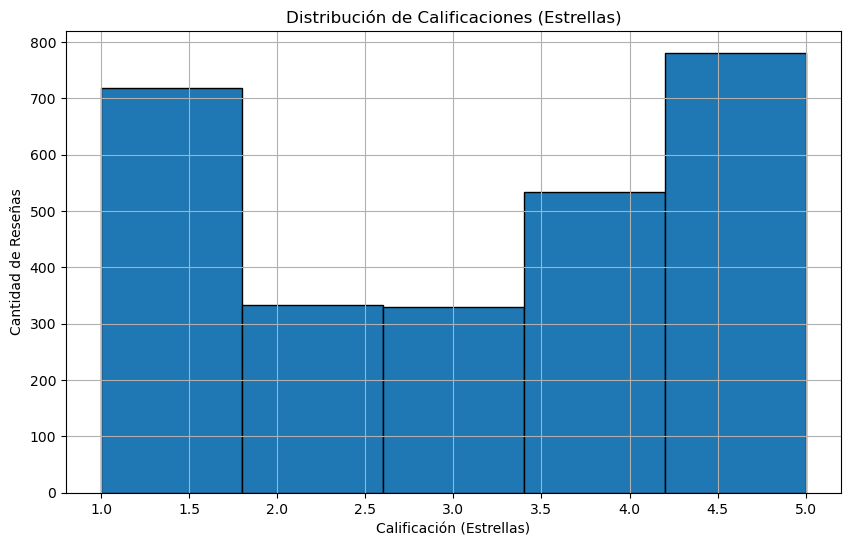

In [13]:
import matplotlib.pyplot as plt
# Crear un histograma de las calificaciones (estrellas) con Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['stars'], bins=5, edgecolor='k')
plt.xlabel('Calificación (Estrellas)')
plt.ylabel('Cantidad de Reseñas')
plt.title('Distribución de Calificaciones (Estrellas)')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [27]:
 #Calcular el promedio de todas las estrellas en el DataFrame
promedio_total = filtered_df['stars'].mean()

# Imprimir el promedio de todas las estrellas
print(f'El promedio de todas las estrellas es: {promedio_total:.2f}')

El promedio de todas las estrellas es: 3.12


En total el promedio de todos los hoteles es de 3.12 estrellas para el rango de 2016 a 2020, ligeramente positivo aunque con margen de mejora.

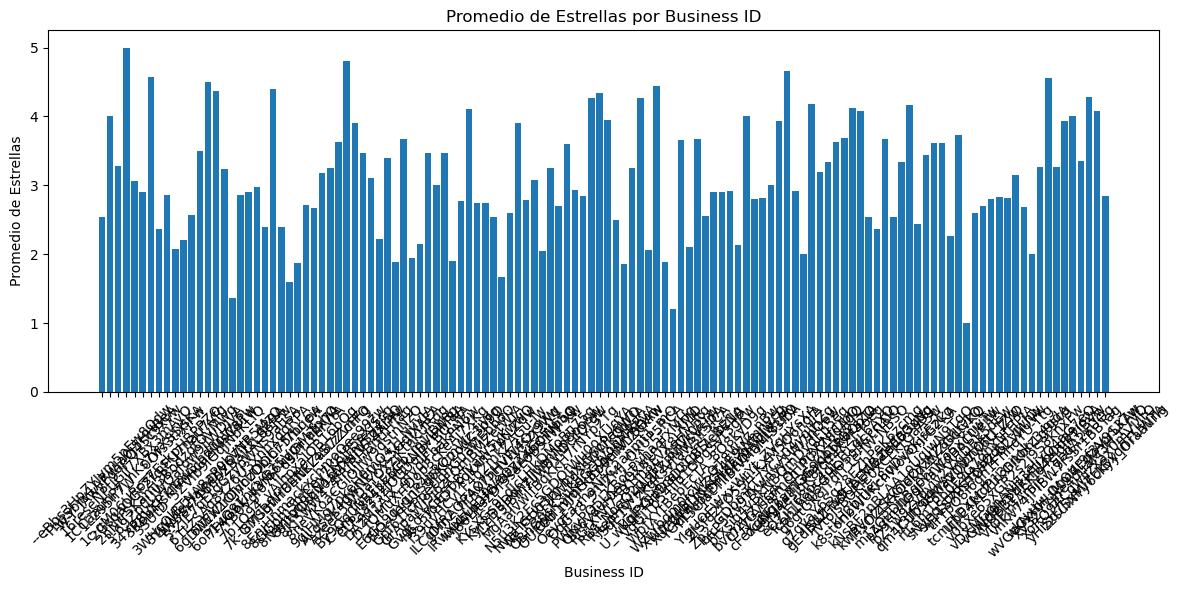

In [14]:
# Calcular el promedio de estrellas por business_id
average_stars_by_business = filtered_df.groupby('business_id')['stars'].mean().reset_index()

# Crear un gráfico de barras con Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(average_stars_by_business['business_id'], average_stars_by_business['stars'])
plt.xlabel('Business ID')
plt.ylabel('Promedio de Estrellas')
plt.title('Promedio de Estrellas por Business ID')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [28]:
# Calcular el promedio de estrellas por business_id único
promedio_por_business_id = filtered_df.groupby('business_id')['stars'].mean()

# Imprimir el promedio de estrellas para cada business_id único
for business_id, promedio in promedio_por_business_id.items():
    print(f'Business ID: {business_id}, Promedio de Estrellas: {promedio:.2f}')

Business ID: --eBbs3HpZYIym5pEw8Qdw, Promedio de Estrellas: 2.54
Business ID: -Thb5brv1ARwIa0j5HHBeA, Promedio de Estrellas: 4.00
Business ID: -w-Y_iAwyFgaj-O4Sc9xvw, Promedio de Estrellas: 3.29
Business ID: 16reseNPtJGil7XBx3mAyQ, Promedio de Estrellas: 5.00
Business ID: 1CCaaunP7_hKs7wXSSJsKA, Promedio de Estrellas: 3.07
Business ID: 1L295h7W__0Ofs3tIXjI-w, Promedio de Estrellas: 2.90
Business ID: 1c-qM06URos7EskpHBPPZQ, Promedio de Estrellas: 4.57
Business ID: 2GsqaQGFZfqjEU7nau7vfg, Promedio de Estrellas: 2.36
Business ID: 2nNrr5KamJ3BodzqtOvMwg, Promedio de Estrellas: 2.86
Business ID: 3-69Zp0UWQafow9ilWDjvA, Promedio de Estrellas: 2.08
Business ID: 34XP8VKP7nzw3jnd0pWaPw, Promedio de Estrellas: 2.20
Business ID: 3RbbTJsKllmAcaziMsC81w, Promedio de Estrellas: 2.57
Business ID: 3SUtD_5ZVlb9iGqJNbKLiQ, Promedio de Estrellas: 3.50
Business ID: 3WHcQlBTNA8aP0kVNR5MzQ, Promedio de Estrellas: 4.50
Business ID: 3YWVle2IalnDWQ7TF_q29A, Promedio de Estrellas: 4.38
Business ID: 4W38r716n6ZB

Y estos son los promedios para cada hotel de la cadena, en el rango de 2016 a 2020.

C:\Users\naomi\AppData\Local\Temp\ipykernel_5156\1246805095.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df.corr()


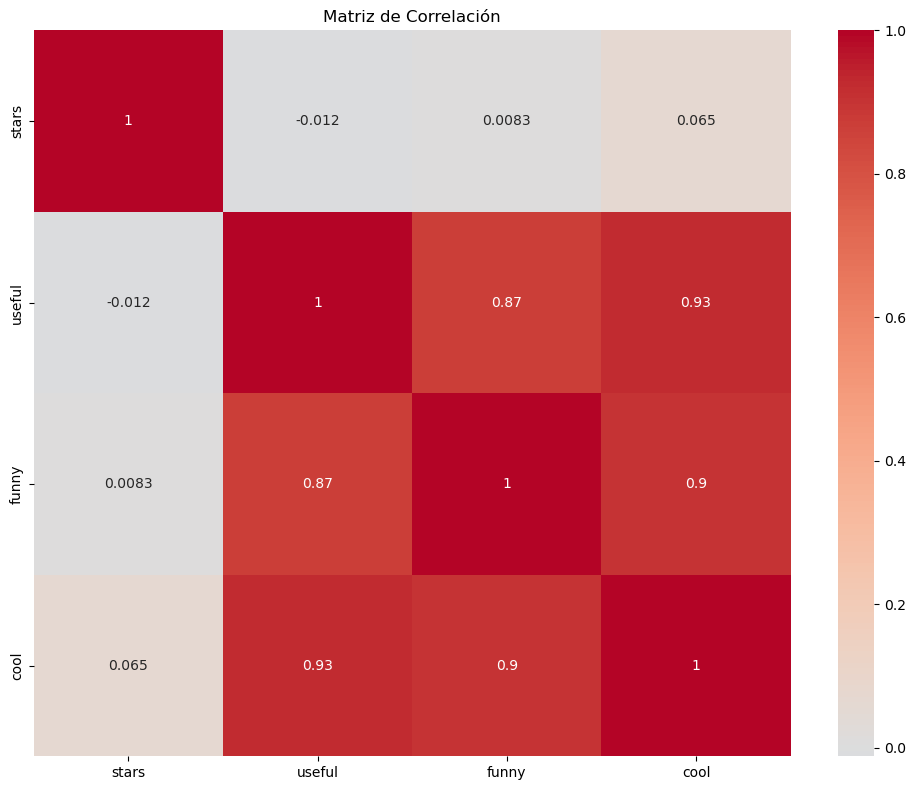

In [16]:

import seaborn as sns
# Calcular la matriz de correlación
correlation_matrix = filtered_df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [17]:
from wordcloud import WordCloud

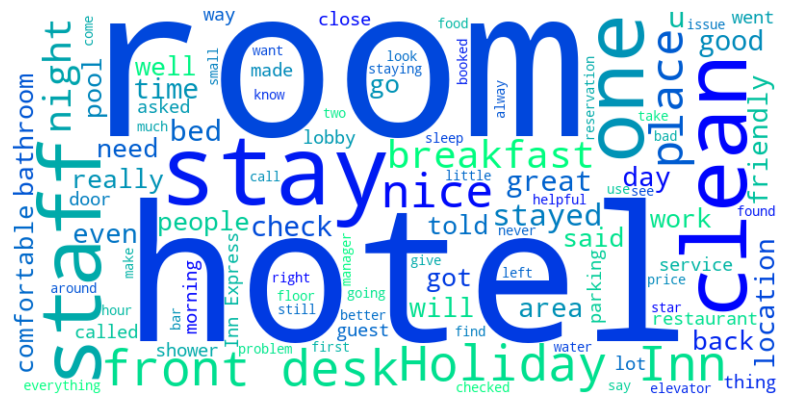

In [18]:
# Extraer el texto de las reseñas
text = " ".join(review for review in selected_rows["text"])

# Crear la nube de palabras con la librería wordcloud
wc = WordCloud(background_color="white", max_words=100, width=800, height=400, colormap="winter")
wc.generate(text)

# Mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

En la nube de palabras arriba pueden ver las palabras que más se repiten en las reseñas.

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [20]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
def get_sentiment_label(text):
    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]
    if compound >= 0.05:
        label = "positivo"
    elif compound <= -0.05:
        label = "negativo"
    else:
        label = "neutral"
    return compound, label

In [22]:
filtered_df["compound"], filtered_df["feeling"] = zip(*filtered_df["text"].apply(get_sentiment_label))

C:\Users\naomi\AppData\Local\Temp\ipykernel_5156\1132875438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["compound"], filtered_df["feeling"] = zip(*filtered_df["text"].apply(get_sentiment_label))
C:\Users\naomi\AppData\Local\Temp\ipykernel_5156\1132875438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["compound"], filtered_df["feeling"] = zip(*filtered_df["text"].apply(get_sentiment_label))


In [23]:
filtered_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,compound,feeling
1582,QGxr7ttcWFOMbSvGu92sEg,o--zHBo8ihFUeqBhbx7Qag,1L295h7W__0Ofs3tIXjI-w,3,4,0,2,"On a recent trip to Port Richey, I selected Ho...",2017-02-19 08:09:32,0.6510,positivo
3055,DzEFQ9A01_ct8PKafW7CuA,5JnK2rgO3tZNSHgkcZX7Ig,U_wKqFYSpD8D3CBl7e8ENA,2,0,0,0,Yelp take notice this is no longer a Holiday I...,2016-03-17 20:27:03,0.0644,positivo
3873,hDR19yLWk8QN-tG1iaTNPw,Jkj7lcXTVWg4ZIxLyXq9bg,Gpf61fcPpeUgnG0aMEbhoQ,5,0,0,0,This hotel is awesome!! Very close to Philly a...,2018-02-24 14:35:46,0.9820,positivo
5583,nc__YQe9w8-Zt6v8eVXIoA,gXnphRQ9apRvK8fKhfzLGQ,I39uvHCyLF4q2mkZAGu-lw,4,0,0,0,Customer service was awesome the complimentary...,2016-07-03 17:55:42,0.7351,positivo
6240,an5D0qF_cQlq8npZgHTsxw,y1rYWD473P7wVmIgANHFSg,VgGITb54IIb1G0gSVt3gkw,2,1,0,0,I would NEVER stay here again. Maybe they gave...,2016-05-31 02:49:28,0.9318,positivo
...,...,...,...,...,...,...,...,...,...,...,...
6974578,oJ2UKkRdWE3q-DWFoWvtHA,WHAsSEaHcJkTLD1G2Ohdhg,e9fy4esJqK8JcmlXZF4oeg,3,1,0,0,So let me start off with saying. That the staf...,2019-07-30 05:38:11,0.8663,positivo
6980319,omPioJSX8djamDcnAAtD3g,tqxRZ4mZCIZgpP6rVRKSMA,7k-GMSgWrU4NkZa87ZvnFQ,1,0,0,0,Unfortunately I never got around to taking pic...,2020-05-31 18:02:21,-0.9347,negativo
6980854,vnMT14XNzYsYO4ILwgZpoA,bsk6BbzI5KwAee7k8IeYhQ,e9fy4esJqK8JcmlXZF4oeg,2,0,1,0,The hotel staff were very helpful and nice. Th...,2018-06-05 23:48:00,0.8380,positivo
6981664,-bGIDfG-EMsc8_6acF3eyA,DeqKbAFwcyeC5pvR-SereQ,e9fy4esJqK8JcmlXZF4oeg,3,1,0,0,"It is not St. Louis by a bit, about 30 minutes...",2020-11-26 20:56:41,0.9930,positivo


In [24]:
# Obtener la frecuencia de cada valor en la columna feeling
print(filtered_df["feeling"].value_counts())

# Obtener la proporción de cada valor en la columna feeling
print(filtered_df["feeling"].value_counts(normalize=True))

positivo    1999
negativo     659
neutral       38
Name: feeling, dtype: int64
positivo    0.741469
negativo    0.244436
neutral     0.014095
Name: feeling, dtype: float64


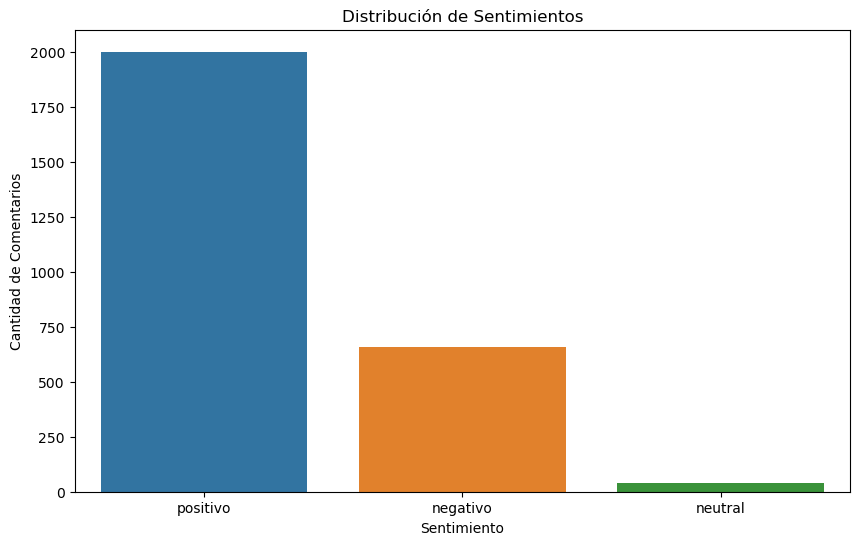

In [25]:
# Gráfico de distribución de sentimientos
plt.figure(figsize=(10, 6))
sns.countplot(x='feeling', data=filtered_df)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()

Para finalizar hice un breve analisis de sentimientos con la librería Vader para observar su distribución. En el mismo gráfico queda evidenciado que las resñeas más alla de las estrellas, son positivas. Aunque este no es el análisis de sentimientos final, ayuda a entender el panorama.